In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

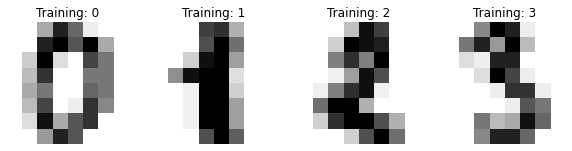

In [2]:
from sklearn .datasets import load_digits
df=load_digits()
_,axes =plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
  ax.set_axis_off()
  ax.imshow(image ,cmap=plt.cm.gray_r,interpolation ="nearest")
  ax.set_title("Training: %i" % label)

In [3]:
df.images.shape

(1797, 8, 8)

In [4]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [5]:
len(df.images)

1797

In [6]:
df.images[0].shape

(8, 8)

In [7]:
n_samples = len(df.images)
data = df.images.reshape((n_samples,-1))
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
data[0].shape

(64,)

In [9]:
data.shape

(1797, 64)

In [10]:
data.min()

0.0

In [11]:
data.max()

16.0

In [12]:
data=data/16
data.min()

0.0

In [13]:
data.max()

1.0

In [14]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,df.target,train_size=0.7,random_state = 202529)
X_train.shape, X_test.shape ,y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [17]:
y_pred = rf.predict(X_test)
y_pred

array([4, 3, 6, 5, 0, 8, 7, 2, 3, 5, 7, 1, 7, 4, 2, 8, 7, 1, 1, 4, 2, 3,
       7, 4, 5, 4, 0, 8, 7, 7, 9, 6, 6, 9, 0, 6, 5, 2, 5, 1, 3, 4, 9, 2,
       7, 1, 3, 6, 8, 5, 9, 2, 3, 0, 1, 0, 6, 2, 4, 5, 1, 3, 1, 4, 8, 5,
       5, 6, 5, 6, 1, 6, 9, 3, 2, 9, 4, 3, 2, 8, 1, 5, 7, 8, 2, 3, 0, 7,
       8, 2, 8, 9, 5, 3, 8, 1, 1, 4, 6, 7, 4, 9, 0, 2, 9, 7, 7, 0, 9, 2,
       6, 0, 4, 9, 8, 6, 1, 1, 2, 3, 1, 1, 0, 0, 8, 6, 0, 7, 7, 1, 0, 2,
       6, 7, 0, 6, 7, 3, 7, 4, 5, 5, 6, 4, 4, 3, 5, 0, 5, 6, 3, 1, 0, 0,
       0, 7, 5, 1, 3, 7, 9, 4, 4, 0, 1, 6, 0, 8, 6, 8, 9, 3, 4, 8, 5, 0,
       0, 1, 0, 2, 4, 7, 3, 7, 5, 3, 0, 8, 8, 5, 6, 3, 2, 9, 4, 5, 1, 3,
       2, 1, 6, 7, 6, 4, 4, 1, 1, 5, 8, 5, 8, 1, 5, 7, 8, 9, 7, 3, 3, 0,
       9, 1, 3, 3, 9, 4, 8, 0, 0, 3, 4, 6, 7, 1, 3, 6, 7, 9, 4, 2, 5, 9,
       3, 8, 1, 7, 1, 2, 2, 2, 3, 6, 0, 6, 1, 3, 7, 2, 1, 1, 9, 3, 9, 1,
       5, 9, 8, 1, 2, 1, 3, 0, 7, 4, 4, 0, 0, 4, 5, 7, 9, 3, 3, 1, 5, 7,
       4, 9, 1, 2, 2, 2, 8, 7, 4, 0, 1, 5, 6, 1, 2,

In [18]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[49,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 59,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 58,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 59,  0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0, 50,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0, 53,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 58,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 49,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  1, 49,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  0,  0, 46]])

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.95      1.00      0.98        59
           2       1.00      1.00      1.00        58
           3       1.00      0.97      0.98        61
           4       0.98      1.00      0.99        50
           5       0.96      0.98      0.97        54
           6       1.00      1.00      1.00        58
           7       0.98      1.00      0.99        49
           8       0.96      0.92      0.94        53
           9       1.00      0.96      0.98        48

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

